# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Putri Awalia Shabrina
- **Email:** shabrinaaaputrii@gmail.com
- **ID Dicoding:** putriawalia2703

## Menentukan Pertanyaan Bisnis

1. Apakah terjadi peningkatan peminjam sepeda dari tahun 2011 ke tahun 2012?
2. Apakah temperature mempengaruhi jumlah peminjam sepeda?
3. Musim apa yang memiliki jumlah peminjam sepeda terbanyak?
4. Bagaimana hubungan temperatur dan musim dengan jumlah peminjaman sepeda?
5. Apakah jumlah kecepatan angin yang tinggi mengurangi pengguna sepeda?
6. Hari apa yang memiliki jumlah peminjam sepeda terbanyak?

## Import Semua Packages/Library yang Digunakan

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

Berikut kode untuk memuat data.

In [231]:
day_df = pd.read_csv('https://raw.githubusercontent.com/anaaputt/bike_sharing/main/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Informasi dataset:**

Bike Sharing Dataset
==========================================



- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days


Dataset characteristics
=========================================
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall')
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


### Assessing Data

Berikut adalah kode untuk melihat tipe data day_df.

In [232]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Terlihat pada data tersebut terdapat tipe data yang harus diperbaiki, yaitu pada dteday yang harus diganti menjadi datetime.
- kata keterangan waktu pada kolom yr, mnth, cnt juga sebaiknya diganti menjadi yr, month, dan count untuk lebih memudahkan pembacaan data kolom.
- Weekday perlu diubah values-nya menjadi nama hari.
- Workingday perlu diganti menjadi yes untuk value 0 dan no untuk value 1 agar menyesuaikan dataset charateristics.

Berikut adalah kode untuk melihat jumlan nilai null pada data.

In [233]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Terlihat bahwa data tidak memiliki null values.


In [234]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Terlihat pula pada data tersebut tidak ada duplikat data.
- Pada deskripsi data tersebut, terlihat bahwa ada keanehan data season, year, dan month seharusnya diganti menjadi object.
- Pada values kolom weekday dan holiday
- Terlihat data temp, atemp, hum, dan windspeed ternormalisasi sehingga seharusnya bila values pada kolom-kolom tersebut diganti menjadi data yang belum ternormalisasi.

### Cleaning Data

Berikut adalah kode untuk mengubah nama-nama kolom.

In [235]:
day_df.rename(columns={
    'yr':'year',
    'mnth': 'month',
    'cnt':'count'
    },inplace=True)

Berikut adalah kode untuk mengubah dteday menjadi tipe datetime.

In [236]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Berikut adalah kode untuk mengubah values dari kolom yr.

In [237]:
change_year = { 0:'2011',
               1:'2012'}

day_df['year']=day_df['year'].apply(lambda x: change_year[x])

Berikut adalah kode untuk mengubah values dari kolom month.

In [238]:
day_df['month'] = day_df['dteday'].dt.month_name()

Berikut adalah kode untuk mengubah tanggal menjadi nama hari.

In [239]:
day_df['weekday'] = day_df['dteday'].dt.day_name()

Berikut adalah kode untuk mengubah values pada kolom workingday menjadi yes untuk value 0 dan no untuk value 1.

In [240]:
change_workingday = { 0:'Yes',
               1:'No'}

day_df['workingday']=day_df['workingday'].apply(lambda x: change_workingday[x])

Berikut adalah kode untuk mengubah values dari kolom season.

In [241]:
season_name = { 1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}

day_df['season']=day_df['season'].apply(lambda x: season_name[x])

Berikut adalah kode untuk inverse dari hasil normalisasi temp, atemp, hum, dan windspeed.

In [242]:
day_df['temp'] = day_df['temp'] * 41
day_df['atemp'] = day_df['atemp'] * 50
day_df['hum'] = day_df['hum'] * 100
day_df['windspeed'] = day_df['windspeed'] * 67

Mengecek hasil setelah perubahan pada tahap cleaning data.

In [243]:
day_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Winter,2011,January,0,Saturday,Yes,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,Yes,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Monday,No,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Winter,2011,January,0,Tuesday,No,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Winter,2011,January,0,Wednesday,No,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Berikut adalah kode untuk mengecek kesesuaian data setelah dilakukan pembersihan data (cleaning data).

In [244]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   year        731 non-null    object        
 4   month       731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

Menyimpan data cleaning ke dalam bentuk csv:

In [245]:
day_df.to_csv('Bike_Day_Clean.csv')

## Exploratory Data Analysis (EDA)

### Explore Data Day Bike Sharing

Hasil explorasi data berikut merupakan hasil data jumlah peminjam sepeda pada tahun 2012 dan tahun 2011.

In [246]:
day_df.groupby(by = 'year').mean()['count'].sort_values(ascending = False).reset_index()

,year,count
0,2012,5599.934426
1,2011,3405.761644


Berikut adalah hasil exploratory data yang memberitahu jumlah peminjam sepeda. Diketahui bahwa peminjam sepeda di hari libur lebih banyak dibandingkan hari kerja.

In [247]:
day_df.groupby(by = 'workingday').mean()['count'].sort_values(ascending = False).reset_index()

,workingday,count
0,No,4584.820000
1,Yes,4330.168831


Rata-rata peminjam sepeda terbanyak ada pada musim gugur. Hal tersebut dapat terlihat dari kode berikut ini.

In [248]:
day_df.groupby(by = 'season').mean()['count'].sort_values(ascending = False).reset_index()

,season,count
0,Summer,5644.303191
1,Spring,4992.331522
2,Fall,4728.162921
3,Winter,2604.132597


Setelah diketahui, musim gug. Hal tersebut dapat terlihat dari kode berikut ini.

In [249]:
day_df.groupby(by = 'season').mean()['temp'].sort_values(ascending = False).reset_index()

,season,temp
0,Summer,28.958682
1,Spring,22.320611
2,Fall,17.339148
3,Winter,12.207650


Berikut adalah urutan dari jumlah peminjam sepeda berdasarkan bulan dari yang terbanyak hingga yang paling sedikit.

In [250]:
day_df.groupby(by = 'month').mean()['count'].sort_values(ascending = False).reset_index()

,month,count
0,June,5772.366667
1,September,5766.516667
2,August,5664.419355
3,July,5563.677419
4,May,5349.774194
5,October,5199.225806
6,April,4484.900000
7,November,4247.183333
8,March,3692.258065
9,December,3403.806452


Berikut adalah kode untuk melihat persebaran jumlah peminjam sepeda setiap bulan pad hari libur dan hari kerja.

In [251]:
day_df.groupby(by=['year','month','workingday']).agg({'count':'sum'})

count
year month     workingday        
2011 April     No           62815
               Yes          32055
     August    No          106129
               Yes          30562
     December  No           63554
               Yes          23769
     February  No           33601
               Yes          14614
     January   No           27009
               Yes          11180
     July      No           88420
               Yes          52921
     June      No          103468
               Yes          40044
     March     No           47037
               Yes          17008
     May       No           91352
               Yes          44469
     November  No           68623
               Yes          33544
     October   No           79222
               Yes          44289
     September No           85034
               Yes          42384
2012 April     No          117020
               Yes          57204
     August    No          165650
               Yes          48853
     December  No           88544
               Yes          35169
     February  No           77403
               Yes          25734
     January   No           66907
               Yes          29837
     July      No          143010
               Yes          60597
     June      No          138257
               Yes          64573
     March     No          120026
               Yes          44849
     May       No          134483
               Yes          61382
     November  No          105338
               Yes          47326
     October   No          140915
               Yes          57926
     September No          138593
               Yes          79980

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terjadi peningkatan peminjam sepeda dari tahun 2011 ke tahun 2012?

Fungsi untuk membuat color palette agar pada barplot dengan jumlah tertinggi memilik warna yang khas.

In [252]:
def set_custom_palette(series, max_color = 'pink', other_color = 'lightgrey'):
    max_val = series.max()
    pal = []

    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

Berikut merupakan kode untuk menampilkan barplot jumlah pengguna sepeda pada tahun 2011 dan 2012.

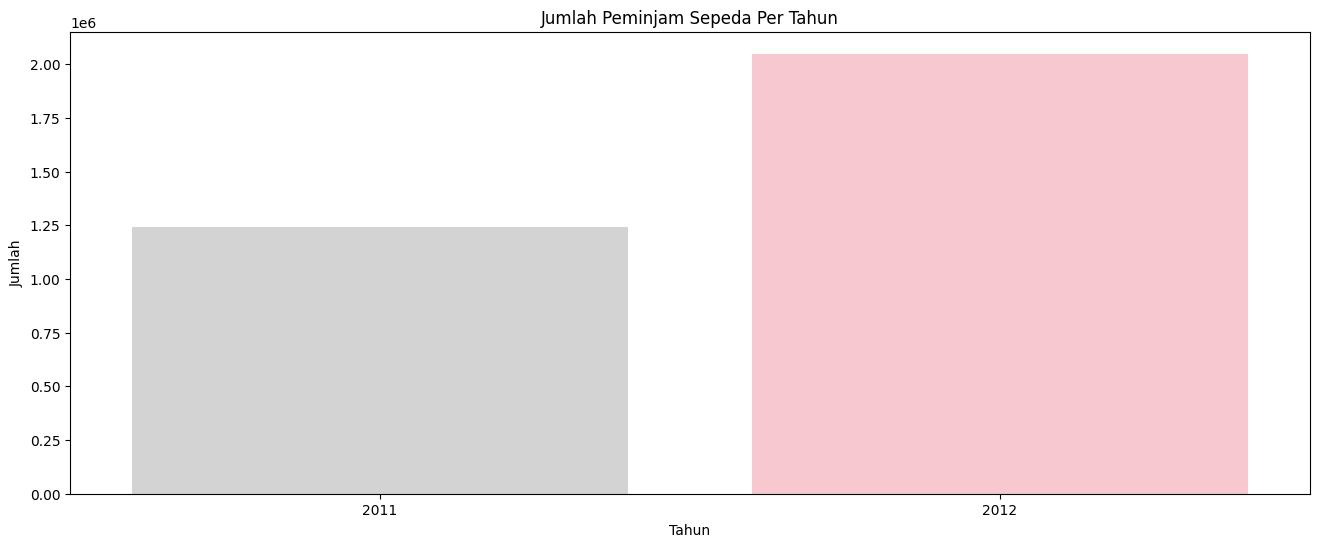

In [253]:
count_year_df = day_df.groupby(by='year').agg({'count':'sum'}).reset_index()
fig, ax = plt.subplots(figsize=(16,6))
palette = set_custom_palette(count_year_df['count'])

sns.barplot(data=count_year_df, x='year', y='count', palette=palette, ax=ax)
ax.set_title('Jumlah Peminjam Sepeda Per Tahun')
ax.set_xlabel('Tahun')
ax.set_ylabel('Jumlah')
plt.show()

### Pertanyaan 2: Apakah temperature mempengaruhi jumlah peminjam sepeda?

Membuat kode untuk menampilkan regression plot untuk melihat hubungan temperatur dengan jumlah peminjam sepeda.

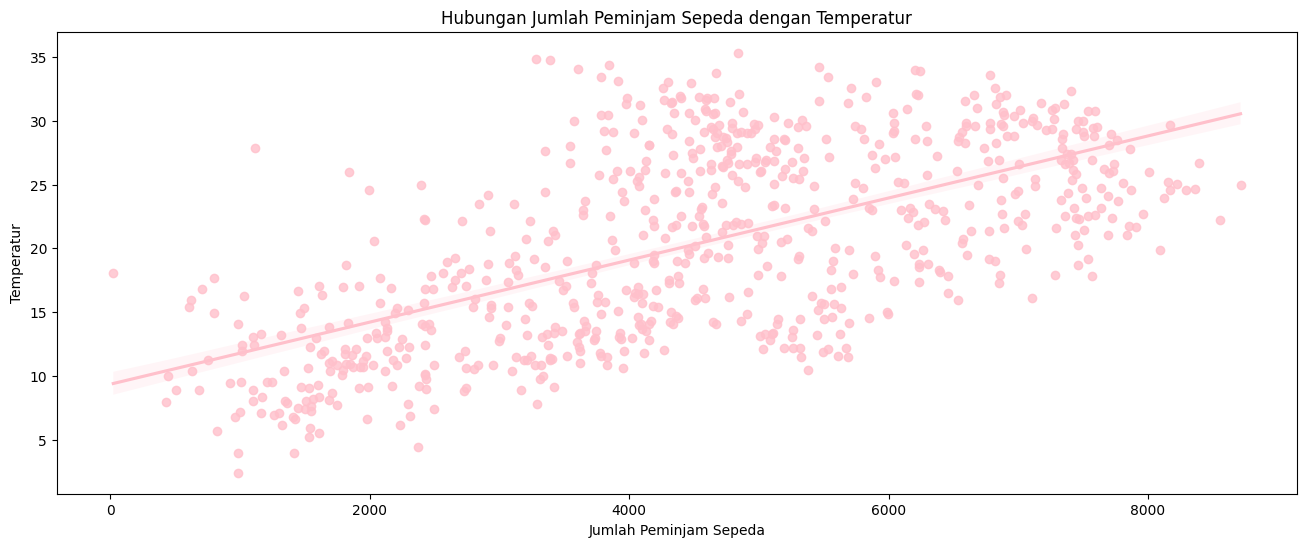

In [254]:
fig = plt.subplots(figsize=(16,6))

sns.regplot(data=day_df, x='count', y='temp', color = 'pink')

plt.title('Hubungan Jumlah Peminjam Sepeda dengan Temperatur')
plt.xlabel('Jumlah Peminjam Sepeda')
plt.ylabel('Temperatur')
plt.show()

### Pertanyaan 3: Musim apa yang memiliki jumlah peminjam sepeda terbanyak?


Berikut adalah kode untuk menampilkan pie chart untuk melihat jumlah persentase peminjam sepeda per musim.

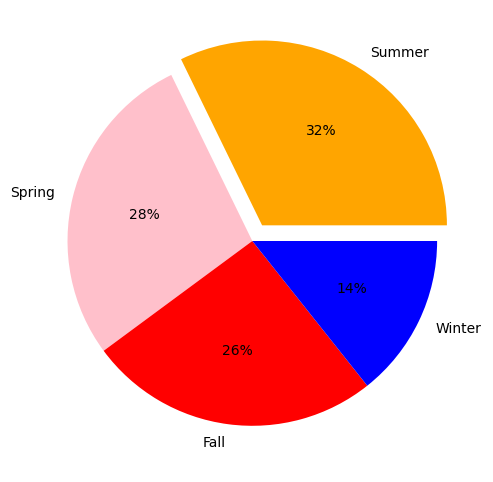

In [255]:
season_count = day_df.groupby(by='season').agg({'count':'sum'}).sort_values(by='count',ascending=False).reset_index()
fig = plt.subplots(figsize=(16,6))

colors = ['orange','pink','red','blue']

explode = [0.1,0,0,0]
plt.pie(season_count['count'], labels=season_count['season'], explode=explode, colors=colors, autopct='%.0f%%')

plt.show()

### Pertanyaan 4: Bagaimana hubungan temperatur dan musim dengan jumlah peminjaman sepeda?


Berikut adalah kode untuk membuat scatter plot hubungan antara musim, temperatur, dan jumlah peminjaman sepeda.

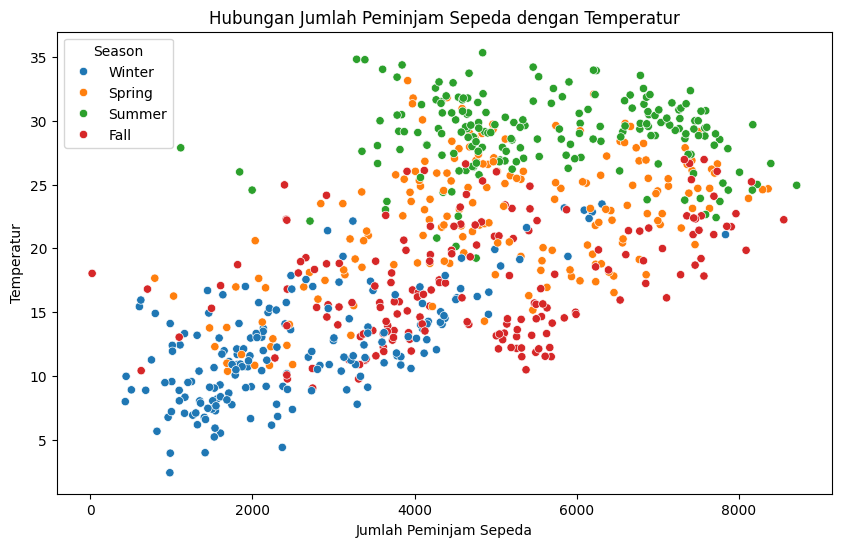

In [256]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=day_df, x='count', y='temp', color='pink', hue='season')

plt.title('Hubungan Jumlah Peminjam Sepeda dengan Temperatur dan Musim')
plt.xlabel('Jumlah Peminjam Sepeda')
plt.ylabel('Temperatur')
plt.legend(title='season')
plt.show()

### Pertanyaan 5: Apakah jumlah kecepatan angin yang tinggi mengurangi pengguna sepeda?

Berikut adalah kode untuk membuat grafik scatter plot antara jumlah pengguna sepeda dengan windspeed.

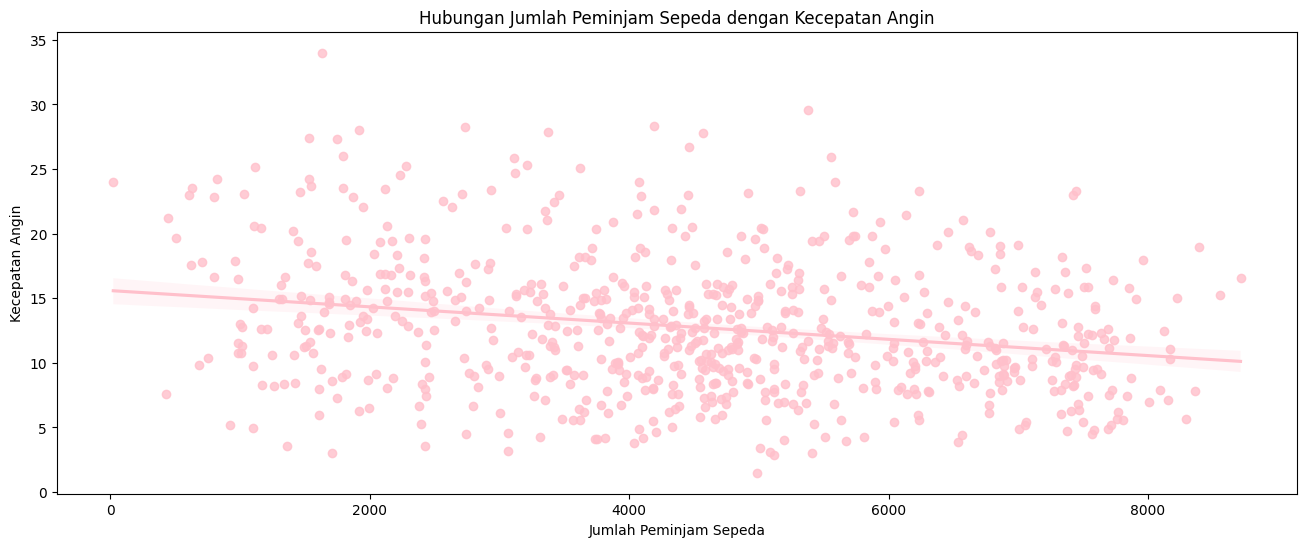

In [257]:
fig = plt.subplots(figsize=(16,6))

sns.regplot(data=day_df, x='count', y='windspeed', color = 'pink')

plt.title('Hubungan Jumlah Peminjam Sepeda dengan Kecepatan Angin')
plt.xlabel('Jumlah Peminjam Sepeda')
plt.ylabel('Kecepatan Angin')
plt.show()

### Pertanyaan 6: Hari apa yang memiliki jumlah peminjam sepeda terbanyak?

Berikut adalah kode untuk menampilkan bar plot dengan jumlah peminjam sepeda terbanyak pada hari tertentu.

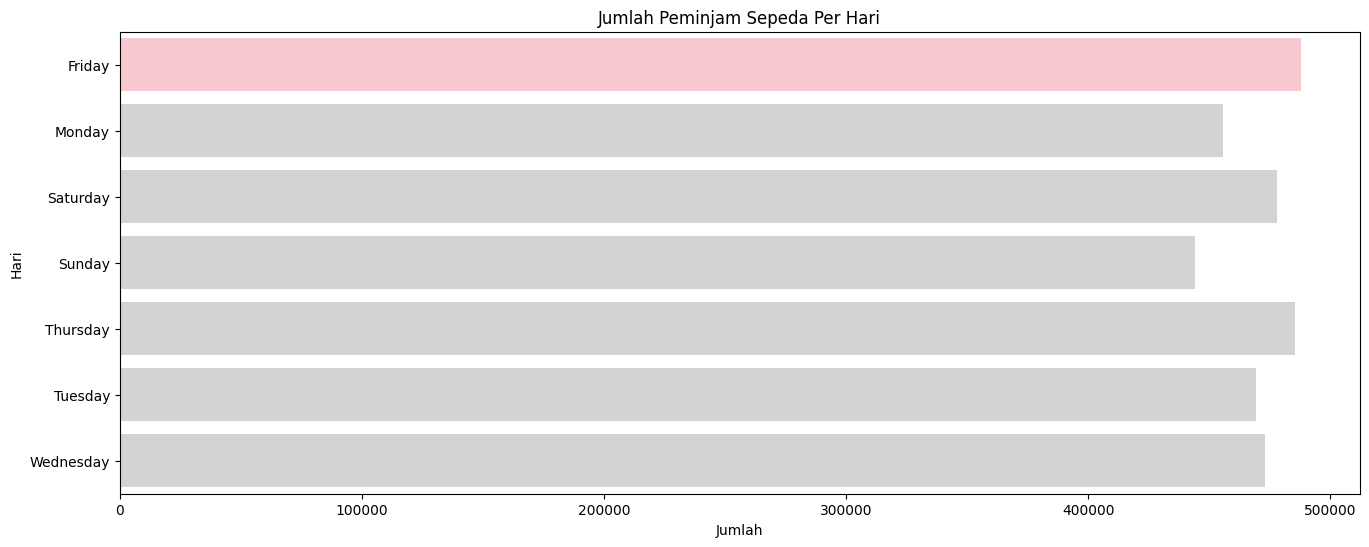

In [258]:
count_day_df = day_df.groupby(by='weekday').agg({'count':'sum'}).reset_index()
fig, ax = plt.subplots(figsize=(16,6))
palette = set_custom_palette(count_day_df['count'])

sns.barplot(data=count_day_df, x='count', y='weekday', palette=palette, ax=ax)
ax.set_title('Jumlah Peminjam Sepeda Per Hari')
ax.set_xlabel('Jumlah')
ax.set_ylabel('Hari')
plt.show()

## Conclusion

**- Conclution pertanyaan 1**

Tahun 2012 memiliki jumlah peminjam yang lebih banyak banyak dibandingkan dengan tahun 2011. Hal tersebut terlihat dari grafik Jumlah Peminjam Sepeda Per Tahun.

**- Conclution pertanyaan 2**

Hubungan temperatur dengan jumlah peminjam sepeda berbanding lurus. Semakin tinggi temperatur, maka semakin banyak jumlah peminjam sepeda.

**- Conclution pertanyaan 3**

Sesuai dengan grafik hubungan musim denagn jumlah peminjam sepeda, peminjam terbanyak ada pada musim panas atau summer.

**- Conclution pertanyaan 4**
Grafik hubungan temperatur, musim, dan jumlah peminjam sepeda sesuai dengan kesimpulan kedua, yaitu peminjam terpanas ada pada temperatur tertinggi (musim summer).


**- Conclution pertanyaan 5**

Kecepatan angin yang semakin tinggi menyebabkan peminjam sepeda semakin sedikit. Hal itu dapat disebabkan karena kondisi yang membuat pengguna susah menggunakan sepeda atau kecepatan angin yang terlalu tinggi sehingga dapat berbahaya bila bersepeda dalam keadaan kecepatan angin yang tinggi.

**- Conclution pertanyaan 6**

Hari Jumat merupakan hari peminjam sepeda terbanyak berdasarkan grafik Jumlah Pengguna Sepeda Per Hari.